# Josephus Problem

## Preface

In [1]:
# Symbols
from sympy import *
from sympy.plotting import plot_parametric
import numpy as np
import scipy
import scipy.special

init_printing(use_unicode=True)

x,y,z,t,mu,nu=symbols('x y z t mu nu')
k,m,n=symbols('k m n', integer=True)
f,g,h=symbols('f g h', cls=Function)

R=S.Reals
C=S.Complexes

i=sqrt(-1)

In [2]:
# Plotting Setup
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt

## Introduction

In [3]:
import networkx as nx

The Josephus problem state will be defined as a tuple $(i,G)$ where $i$ is the node about to kill, and $G$ is a directed graph with edges from killers to victims.

In [4]:
def setup(n):
    G = nx.empty_graph(n, create_using = nx.DiGraph)
    return (0,G)

It follows from our definition that a node is alive if it has no edges directed into it.

In [5]:
def is_alive(i, G):
    return not any(True for _ in G.predecessors(i))
def next_alive(i, G):
    l = G.order()
    j = (i + 1) % l
    while j != i:
        if is_alive(j, G):
            return j
        j = (j + 1) % l
    return i

Such a state will be drawn as the digraph, with the next killer marked.

In [6]:
def draw(jp):
    G = jp[1]
    ca = lambda v: ('g' if v == jp[0] 
                    else ('y' if is_alive(v, G) 
                          else 'r'))
    colors = [ca(v) for v in G]
    nx.draw_circular(G, with_labels=True, node_color=colors, label='X')

To advance the problem state, we add an edge from the current killer to the next living node, and then advance the current killer to the new, next killer.

In [7]:
def next(jp):
    G = jp[1].copy()
    i = jp[0]
    l = G.order()
    a = next_alive(i, G)
    if i == a:
        return (i, G)
    G.add_edge(i, a, weight = G.degree)
    return (next_alive(a, G), G)

The problem is solved, when only one node remains alive.

In [8]:
def finish(jp):
    i = -1
    while jp[0] != i:
        i = jp[0]
        jp = next(jp)
    return jp

## Sample runs

In [9]:
jp = setup(41)

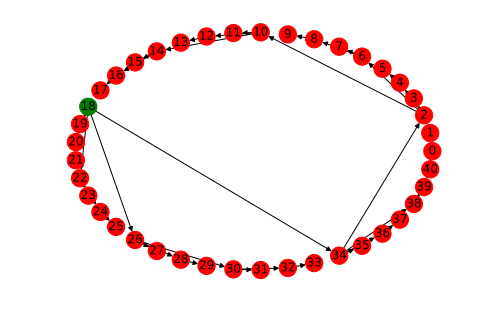

In [10]:
jp = finish(jp)
draw(jp)

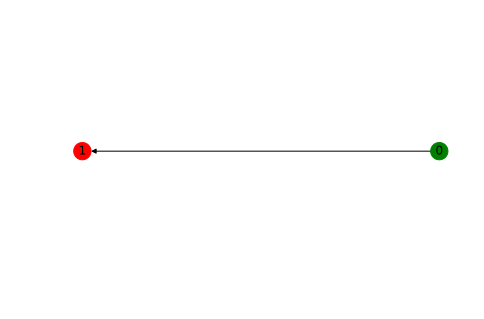

In [11]:
draw(finish(setup(2)))

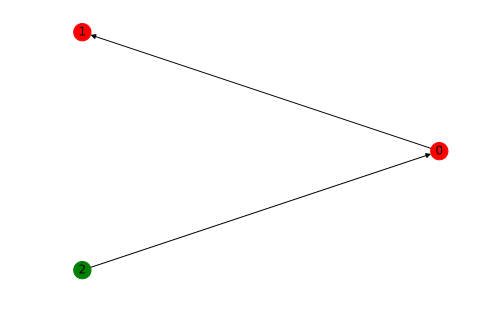

In [12]:
draw(finish(setup(3)))

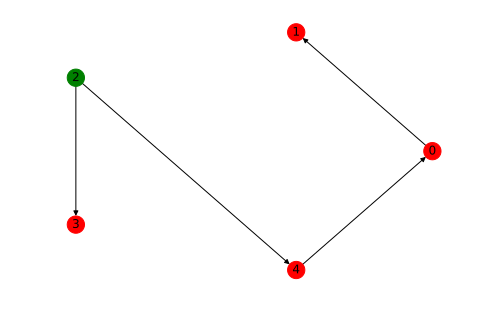

In [13]:
draw(finish(setup(5)))

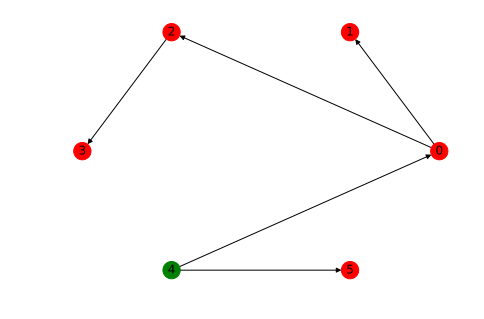

In [14]:
draw(finish(setup(6)))

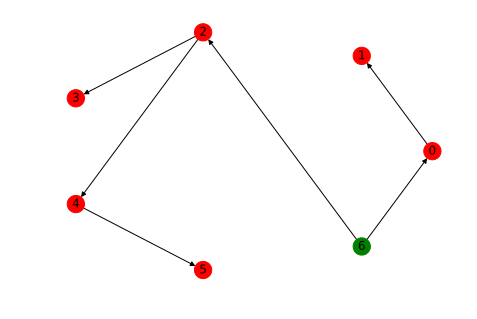

In [15]:
draw(finish(setup(7)))

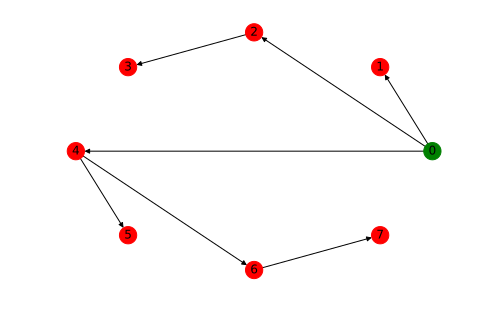

In [16]:
draw(finish(setup(8)))

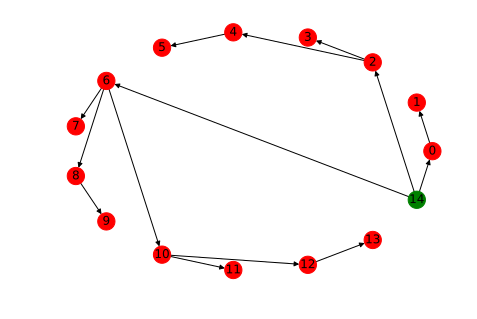

In [17]:
draw(finish(setup(15)))

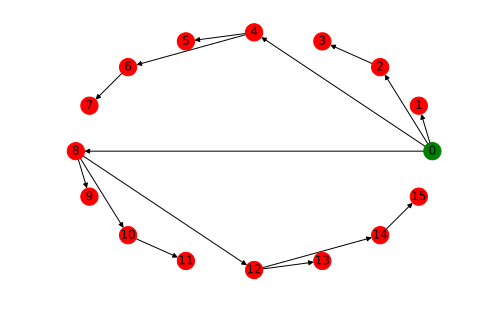

In [18]:
draw(finish(setup(16)))